https://medium.com/@galen.ballew/opencv-lanedetection-419361364fc0

* Convert Image to grayscale
* filter the image with only white color present(no need for yellow since it does not need.)
* Perform canny edge to find all the edges
* Perform region of interest
* Perform hough line transform
* Put detected lines back on the original images

https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html
* find contours for cv2

In [161]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
def open_img(img):
    image = cv2.imread(img)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return image

In [163]:
def open_img_color(img):
    image = cv2.imread(img)
    return image

In [164]:
def show_image_color(img):
    temp = img[:,:,-1]
    img[:,:,-1] = img[:,:,0]
    img[:,:,0] = temp
    plt.imshow(img)
    plt.show()

In [165]:
def show_image_gray(img):
    plt.imshow(img,  cmap='gray')
    plt.show()

In [166]:
def do_erode(img,iteration):
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = iteration)
    return erosion

In [167]:
def do_dilate(img,iteration):
    #https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(img,kernel,iterations = iteration)
    return dilation

In [168]:
def filtered_white(img,low_white,high_white):
    mask_white = cv2.inRange(img, low_white, high_white)
    img = cv2.bitwise_and(img, mask_white)
    kernel_size = 5
    gauss_gray = cv2.GaussianBlur(img,(kernel_size,kernel_size),0)
    show_image_gray(gauss_gray)
    return gauss_gray

In [169]:
def hough_transform(s1,edges):
    lines = cv2.HoughLines(edges,1,np.pi/180,200)
    print(lines)
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(s1,(x1,y1),(x2,y2),(0,0,255),2)
    show_img_color(s1)
    return


In [170]:
def canny_edge(img):
    pass

In [171]:
def ROI(img):
    h,w = img.shape[0],img.shape[1]
    print("h: {}".format(h))
    print("w: {}".format(w))
    
    pass

In [172]:
def hough_line_transform(img):
    pass

In [173]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

In [174]:

def hough_lines(original_img, img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    #line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    #draw_lines(line_img,lines)
    print(lines)
    for x1,y1,x2,y2 in lines[0]:
        cv2.line(original_img,(x1,y1),(x2,y2),(0,255,0),2)
    for x1,y1,x2,y2 in lines[1]:
        cv2.line(original_img,(x1,y1),(x2,y2),(0,255,0),2)
    show_image_gray(original_img)
    return

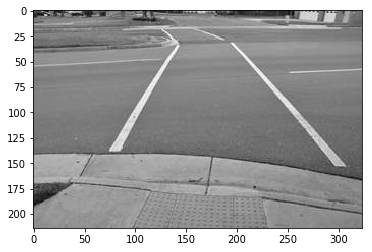

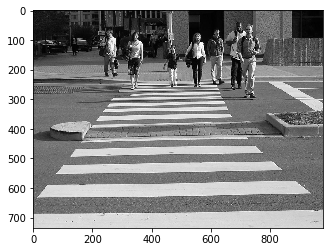

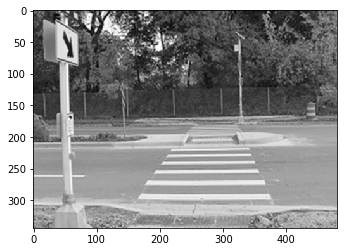

1. filtered image with white present.


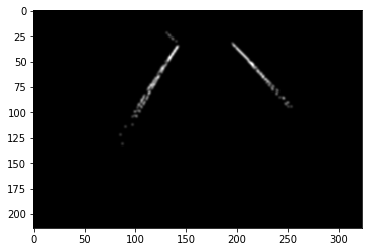

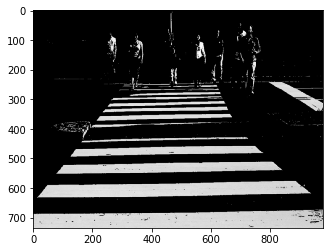

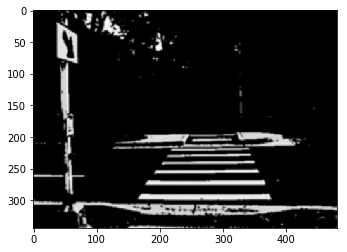

2. Canny Edge using openCV


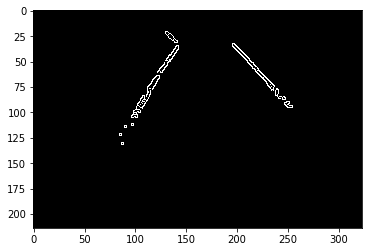

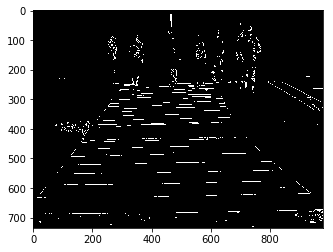

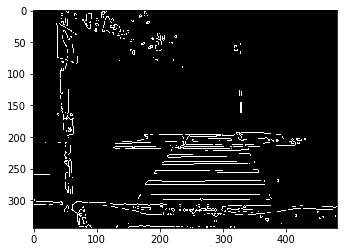

[[[197  32 254  95]]

 [[ 86 131 142  34]]

 [[ 84 122 141  30]]

 [[195  35 254  94]]

 [[ 85 123 142  38]]

 [[ 84 121 141  29]]

 [[201  36 254  93]]

 [[ 87 132 136  45]]

 [[ 96 112 140  29]]]


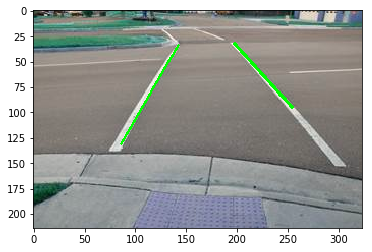

In [177]:
###main
#https://abhishek4273.com/2014/03/15/fast-roadpath-detection-using-opencv/
img_color = open_img_color('two_line_crosswalk_2.jpg')
img = open_img('two_line_crosswalk_2.jpg')
img_2 = open_img('stair_crosswalk_1.jpg')
img_3 = open_img('stair_crosswalk_2.jpg')
show_image_gray(img)
show_image_gray(img_2)
show_image_gray(img_3)
#img = do_erode(img,7)
#img = do_dilate(img,7)
#do filter 
print("1. filtered image with white present.")
img = filtered_white(img,235,255)
img_2 = filtered_white(img_2,200,255)
img_3 = filtered_white(img_3,200,255)

print("2. Canny Edge using openCV")
canny_img = auto_canny(img)
#canny_img = cv2.Canny(img,300,400)
canny_img_2 = cv2.Canny(img_2,250,400)
canny_img_3 = cv2.Canny(img_3,250,250)
#hough_transform(img,canny_img)
show_image_gray(canny_img)
show_image_gray(canny_img_2)
show_image_gray(canny_img_3)

rho = 4
theta = np.pi/180
#threshold is minimum number of intersections in a grid for candidate line to go to output
threshold = 30
min_line_len = 50
max_line_gap = 180
#my hough values started closer to the values in the quiz, but got bumped up considerably for the challenge video

line_image = hough_lines(img_color,canny_img, rho, theta, threshold, min_line_len, max_line_gap)